<a href="https://colab.research.google.com/github/jadhaoanshul/Deep-Learning/blob/main/A21_FNN_Stud_Pract4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DL Lab4
### Name : Anshul Jadhao <br> Batch and Roll No. : A2 & 21

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

## Practical 4
Create a neural network from scratch for a multiclass
classification task with the following architecture:


Input
layer: 4 neurons
First
hidden layer: 3 neurons
Second
hidden layer: 4 neurons
Output
layer: 3 neurons



Generate a random dataset for a 3-class classification
problem. Apply the designed neural network on the generated dataset using the
ReLU activation function in the hidden layers and the softmax activation
function in the output layer for multiclass classification. Use binary
cross-entropy as the loss function for training. Additionally, implement the
all optimizer as part of the training process. Train
the neural network using both optimizers and evaluate their performance on the
dataset using performance metrics accuracy.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [ ]:
# Step 1: Generate a Random Dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=3,
                           n_informative=3, n_redundant=1, random_state=42)

print("Generated Dataset:")
print("Features:", X[:100])
print("Labels:", y[:100])

Generated Dataset:
Features: [[-7.63576538e-01 -1.37636780e+00 -1.32921216e+00 -8.11225933e-01]
 [ 7.98775852e-01  1.47910302e+00 -1.23529644e-01 -1.82966415e+00]
 [ 2.51710984e-01 -1.18311957e+00  1.43640980e+00 -1.22878966e+00]
 [-6.28048368e-01 -1.59609361e+00 -4.00481649e-01 -3.44888165e-01]
 [-1.79159244e-01 -1.20240680e+00  8.72088789e-01  1.85406163e-01]
 [ 7.25190407e-01  9.57999500e-01  2.77721980e-01 -1.73024099e+00]
 [ 8.54206543e-02 -1.27342358e+00  1.43129091e+00 -4.63386321e-01]
 [-6.65310449e-01 -1.86756351e+00  2.98640433e-02  1.03861546e-01]
 [ 6.31590041e-01  1.56118235e+00 -5.40054565e-01 -1.45942625e+00]
 [-1.79709358e-01  7.05105160e-01 -1.58896826e-01  2.17324320e+00]
 [-3.67291461e-01 -2.13909705e-01 -1.18315245e+00 -4.73256644e-01]
 [-4.65540563e-01 -5.02640909e-01  8.73697402e-02  1.82215198e+00]
 [ 9.91744255e-01  1.60315473e+00  1.82397318e+00  8.57775705e-01]
 [-7.02461689e-01 -5.70732438e-01 -1.11007435e+00  8.67396268e-01]
 [ 5.40165050e-01  8.31787270e-01

In [ ]:
# One-Hot Encoding of labels
ohe = OneHotEncoder(sparse_output=False)
y_one_hot = ohe.fit_transform(y.reshape(-1, 1))
print("One-Hot Encoded Labels:")
print(y_one_hot[:5])

One-Hot Encoded Labels:
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [ ]:
# Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

In [ ]:
# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Standardized Training Features:")
print(X_train[:5])

Standardized Training Features:
[[ 0.82824262 -0.49192863  1.07799796 -1.55605876]
 [-0.41415237 -0.79355707  1.10671746  1.66891098]
 [-0.0637306   0.45091386 -0.23397134  0.76381877]
 [-1.14583527 -1.04779579 -0.82053612 -0.46507469]
 [-1.65901934 -0.26184995 -1.28301812  2.00614525]]


In [ ]:
# Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
# Step 2: Define the Neural Network Architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(4, 3)
        self.fc2 = nn.Linear(3, 4)
        self.fc3 = nn.Linear(4, 3)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

# Initialize the Model
model = NeuralNetwork()
print("Neural Network Model:")
print(model)


Neural Network Model:
NeuralNetwork(
  (fc1): Linear(in_features=4, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=3, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(4, 8)
        self.fc2 = nn.Linear(8, 6)
        self.fc3 = nn.Linear(6, 3)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x

model = MyModel()

In [ ]:
import numpy as np
import math

def do_adam(X, Y, init_w, init_b, eta=0.1, max_epochs=1000, beta1=0.9, beta2=0.999, eps=1e-8):
    w = init_w
    b = init_b

    # Initialize moment estimates
    m_w, m_b = 0, 0  # First moment (mean)
    v_w, v_b = 0, 0  # Second moment (variance)

    # Initialize history for tracking progress
    w_history, b_history, error_history = [], [], []

    for epoch in range(max_epochs):
        dw, db = 0, 0  # Initialize gradients

        for x, y in zip(X, Y):
            dw_i = grad_w(w, b, x, y)  # Calculate gradient w.r.t. w
            db_i = grad_b(w, b, x, y)  # Calculate gradient w.r.t. b

            dw += dw_i
            db += db_i

        # Apply bias correction for first and second moments
        m_w = beta1 * m_w + (1 - beta1) * dw
        m_b = beta1 * m_b + (1 - beta1) * db

        v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
        v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

        m_w_hat = m_w / (1 - beta1 ** (epoch + 1))
        m_b_hat = m_b / (1 - beta1 ** (epoch + 1))

        v_w_hat = v_w / (1 - beta2 ** (epoch + 1))
        v_b_hat = v_b / (1 - beta2 ** (epoch + 1))

        # Update weights and biases
        w -= eta * m_w_hat / (np.sqrt(v_w_hat) + eps)
        b -= eta * m_b_hat / (np.sqrt(v_b_hat) + eps)

        # Track progress
        w_history.append(w)
        b_history.append(b)
        error_history.append(compute_loss(w, b, X, Y))

        # Print progress (every 100 epochs for example)
        if epoch % 100 == 0:
            print(f"Epoch [{epoch+1}/{max_epochs}], Loss: {error_history[-1]:.4f}")

    return w, b, w_history, b_history, error_history

In [ ]:
def do_stochastic_gradient_descent(X, Y, init_w, init_b, eta=1.0, max_epochs=1000):
    w = init_w
    b = init_b

    # Initialize history for tracking progress
    w_history, b_history, error_history = [], [], []

    for epoch in range(max_epochs):
        dw, db = 0, 0  # Initialize gradients

        for x, y in zip(X, Y):
            dw_i = grad_w(w, b, x, y)  # Calculate gradient w.r.t. w
            db_i = grad_b(w, b, x, y)  # Calculate gradient w.r.t. b

            dw += dw_i
            db += db_i

        # Update weights and biases
        w -= eta * dw
        b -= eta * db

        # Track progress
        w_history.append(w)
        b_history.append(b)
        error_history.append(compute_loss(w, b, X, Y))

        # Print progress (every 100 epochs for example)
        if epoch % 100 == 0:
            print(f"Epoch [{epoch+1}/{max_epochs}], Loss: {error_history[-1]:.4f}")

    return w, b, w_history, b_history, error_history


In [ ]:
# Example Gradient Functions
def grad_w(w, b, x, y):
    # Calculate gradient of w (example for linear regression)
    return (2 * (w * x + b - y) * x)

def grad_b(w, b, x, y):
    # Calculate gradient of b (example for linear regression)
    return 2 * (w * x + b - y)
# Example Loss Function
def compute_loss(w, b, X, Y):
    # Calculate Mean Squared Error (MSE) loss
    loss = 0
    for x, y in zip(X, Y):
        loss += (w * x + b - y) ** 2
    return loss.item() / len(X)  # Return a scalar value using .item()

In [ ]:
# Initialize your parameters (e.g., for a linear model)
init_w, init_b = 0.0, 0.0
eta = 0.1  # Learning rate
max_epochs = 1000  # Number of epochs

# Define your dataset (X and Y)
X = np.random.randn(100, 1)  # 100 data points, 1 feature
Y = 2 * X + 1 + np.random.randn(100, 1)  # Linear relation with noise

# Train with Adam
print("Training with Adam:")
w_adam, b_adam, w_history_adam, b_history_adam, error_history_adam = do_adam(X, Y, init_w, init_b, eta)

# Train with SGD
print("\nTraining with SGD:")
w_sgd, b_sgd, w_history_sgd, b_history_sgd, error_history_sgd = do_stochastic_gradient_descent(X, Y, init_w, init_b, eta)


Training with Adam:
Epoch [1/1000], Loss: 6.4577
Epoch [101/1000], Loss: 1.1130
Epoch [201/1000], Loss: 1.1129
Epoch [301/1000], Loss: 1.1129
Epoch [401/1000], Loss: 1.1129
Epoch [501/1000], Loss: 1.1129
Epoch [601/1000], Loss: 1.1129
Epoch [701/1000], Loss: 1.1129
Epoch [801/1000], Loss: 1.1129
Epoch [901/1000], Loss: 1.1129

Training with SGD:
Epoch [1/1000], Loss: 2883.5692
Epoch [101/1000], Loss: 2510178465144244113340300210684942669579395679736910021573528789116357059295937257899920911675567082173163254437256490932426485239511590704837178253314683687536455959280117505003983726627160914490367494976834832017794096899307543809233055146005985582448743054878290292506624.0000


<ipython-input-50-8e8237a4ab97>:14: RuntimeWarning: overflow encountered in square
  loss += (w * x + b - y) ** 2
<ipython-input-47-9927bdd9f585>:15: RuntimeWarning: overflow encountered in add
  dw += dw_i
<ipython-input-47-9927bdd9f585>:16: RuntimeWarning: overflow encountered in add
  db += db_i
<ipython-input-50-8e8237a4ab97>:14: RuntimeWarning: invalid value encountered in add
  loss += (w * x + b - y) ** 2
<ipython-input-50-8e8237a4ab97>:4: RuntimeWarning: invalid value encountered in add
  return (2 * (w * x + b - y) * x)
<ipython-input-50-8e8237a4ab97>:8: RuntimeWarning: invalid value encountered in add
  return 2 * (w * x + b - y)


Epoch [201/1000], Loss: inf
Epoch [301/1000], Loss: nan
Epoch [401/1000], Loss: nan
Epoch [501/1000], Loss: nan
Epoch [601/1000], Loss: nan
Epoch [701/1000], Loss: nan
Epoch [801/1000], Loss: nan
Epoch [901/1000], Loss: nan


In [ ]:
# Loss and Optimizer (You can use either SGD or Adam)
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01)
optimizer_adam = optim.Adam(model.parameters(), lr=0.01)

def train_model(optimizer, epochs=100):
    loss_history = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(X_train_tensor)  # Forward pass
        loss = criterion(outputs, y_train_tensor)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        loss_history.append(loss.item())
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    return loss_history

In [ ]:
# Define the Keras model
model1 = models.Sequential()
model1.add(layers.InputLayer(input_shape=(4,), name="Input Layer"))
model1.add(layers.Dense(8, activation='relu', name="Hidden1"))
model1.add(layers.Dense(6, activation='relu', name="Hidden2"))
model1.add(layers.Dense(3, activation='softmax', name="OutputLayer"))

# Compile the model
model1.compile(optimizer='sgd',
               loss='sparse_categorical_crossentropy',  # For integer labels
               metrics=['accuracy'])

# Assuming X and y are your input and output data
# Train the Keras model
model1.fit(X, y, epochs=100, batch_size=64, validation_split=0.1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - accuracy: 0.4087 - loss: 1.1360 - val_accuracy: 0.3000 - val_loss: 1.1514
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4325 - loss: 1.1142 - val_accuracy: 0.3000 - val_loss: 1.1499
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4273 - loss: 1.1251 - val_accuracy: 0.3000 - val_loss: 1.1484
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4429 - loss: 1.1239 - val_accuracy: 0.3000 - val_loss: 1.1473
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4481 - loss: 1.1180 - val_accuracy: 0.3000 - val_loss: 1.1460
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.4117 - loss: 1.1257 - val_accuracy: 0.3000 - val_loss: 1.1451
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4065 - loss: 1.1350 - val_accuracy: 0.3000 - val_loss: 1.1444
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4169 - loss: 1.1174 - val_accuracy: 0.3000 - val_loss: 1.1433
Ep

In [ ]:
# Train with Adam Optimizer
print("\nTraining with Adam Optimizer:")
adam_loss_history = train_model(optimizer_adam)


Training with Adam Optimizer:
Epoch [1/100], Loss: 1.0981
Epoch [2/100], Loss: 1.0953
Epoch [3/100], Loss: 1.0925
Epoch [4/100], Loss: 1.0896
Epoch [5/100], Loss: 1.0867
Epoch [6/100], Loss: 1.0837
Epoch [7/100], Loss: 1.0806
Epoch [8/100], Loss: 1.0774
Epoch [9/100], Loss: 1.0741
Epoch [10/100], Loss: 1.0706
Epoch [11/100], Loss: 1.0670
Epoch [12/100], Loss: 1.0633
Epoch [13/100], Loss: 1.0594
Epoch [14/100], Loss: 1.0552
Epoch [15/100], Loss: 1.0508
Epoch [16/100], Loss: 1.0460
Epoch [17/100], Loss: 1.0410
Epoch [18/100], Loss: 1.0358
Epoch [19/100], Loss: 1.0305
Epoch [20/100], Loss: 1.0250
Epoch [21/100], Loss: 1.0194
Epoch [22/100], Loss: 1.0136
Epoch [23/100], Loss: 1.0077
Epoch [24/100], Loss: 1.0016
Epoch [25/100], Loss: 0.9952
Epoch [26/100], Loss: 0.9886
Epoch [27/100], Loss: 0.9817
Epoch [28/100], Loss: 0.9744
Epoch [29/100], Loss: 0.9668
Epoch [30/100], Loss: 0.9588
Epoch [31/100], Loss: 0.9506
Epoch [32/100], Loss: 0.9424
Epoch [33/100], Loss: 0.9341
Epoch [34/100], Loss:

In [ ]:
# Step 5: Evaluate Model Performance
def evaluate_model():
    with torch.no_grad():
        predictions = model(X_test_tensor)
        predicted_classes = torch.argmax(predictions, dim=1)
        actual_classes = torch.argmax(y_test_tensor, dim=1)
        accuracy = accuracy_score(actual_classes.numpy(), predicted_classes.numpy())
        print(f'Accuracy: {accuracy:.4f}')

print("\nEvaluating Model Performance:")
evaluate_model()



Evaluating Model Performance:
Accuracy: 0.7250


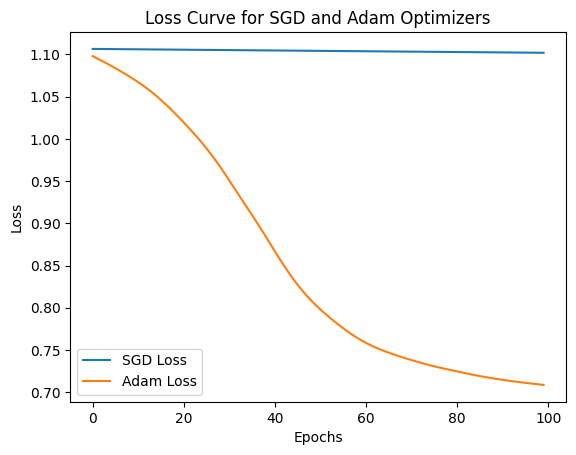

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(100), sgd_loss_history, label='SGD Loss')
plt.plot(range(100), adam_loss_history, label='Adam Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for SGD and Adam Optimizers')
plt.legend()
plt.show()